# Model Training

## 1. Import Required Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler
import warnings

## 2. Import Data

### 2.1 Imbalanced Datasets

In [3]:
X_train = np.load("data/Original/X_train.npy")
y_train = np.load("data/Original/y_train.npy")
X_val = np.load("data/Original/X_val.npy")
y_val = np.load("data/Original/y_val.npy")

In [4]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((208480, 37), (208480,), (52121, 37), (52121,))

### 2.2 Undersampled Datasets

In [5]:
X_train_under_sample = np.load("data/UnderSampling/X_train_undersample.npy")
y_train_under_sample = np.load("data/UnderSampling/y_train_undersample.npy")

### 2.3 Oversampled Datasets

In [6]:
X_train_over_sample = np.load("data/OverSampling/X_train_oversample.npy")
y_train_over_sample = np.load("data/OverSampling/y_train_oversample.npy")

### 2.4 SMOTE Datasets

In [7]:
X_train_smote = np.load("data/SMOTE/X_train_smote.npy")
y_train_smote = np.load("data/SMOTE/y_train_smote.npy")

### Create an Evaluation function to give all metrics after model Training

#### GLOBAL VARIABLES

In [8]:
RANDOM_SEED = 42
MODELS = {
    "KNeighborsClassifier": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "DecisionTree Classifier": DecisionTreeClassifier(),
}

In [9]:
def evaluate_model(true, predicted):
    """
    Generate the confusion matrix and classification report
    """
    cm = confusion_matrix(true, predicted)
    cr = classification_report(true, predicted)
    conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                         index=['Actual:1','Actual:2','Actual:3'])
    # confusion matrix in heatmap
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print(cr) 
    f1_micro = f1_score(true, predicted, average='micro')
    return f1_micro

## Model Training

In [10]:
def train_and_evaluate(X_train, y_train):    
    model_list = []
    f1_micro = []
    for i in range(len(MODELS)):
        model = list(MODELS.values())[i]
        model.fit(X_train, y_train)

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_val_pred = model.predict(X_val)

        # Evaluate Train and Validation dataset
        model_train_f1 = evaluate_model(y_train, y_train_pred)
        model_val_f1 = evaluate_model(y_val, y_val_pred)

        print(list(MODELS.keys())[i])
        model_list.append(list(MODELS.keys())[i])

        print("Model Performance for Training Set")
        print("F1 Micro-Averaged Score: {:.4f}".format(model_train_f1))
        print("--------------------------------------")

        print("Model Performance for Validation Set")
        print("F1 Micro-Averaged Score: {:.4f}".format(model_val_f1))

        f1_micro.append(model_val_f1)

        print('='*30)
        print('\n')
    results = pd.DataFrame(list(zip(model_list, f1_micro)), columns=['Model Name', 'Micro Averaged F1-Score']).sort_values(by=["Micro Averaged F1-Score"],ascending=False)
    return results

### 1. For Imbalanced Datasets

#### Train the models

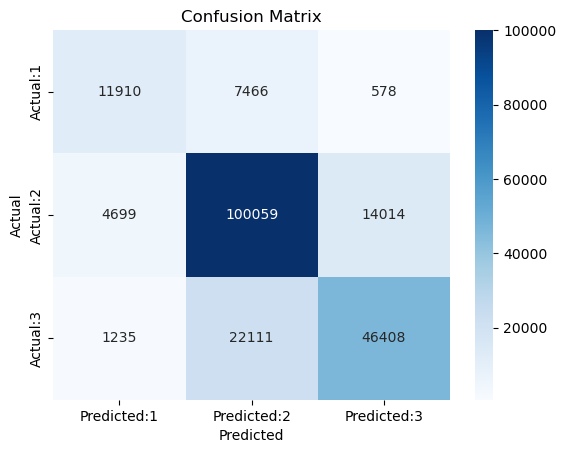

              precision    recall  f1-score   support

           1       0.67      0.60      0.63     19954
           2       0.77      0.84      0.81    118772
           3       0.76      0.67      0.71     69754

    accuracy                           0.76    208480
   macro avg       0.73      0.70      0.72    208480
weighted avg       0.76      0.76      0.76    208480



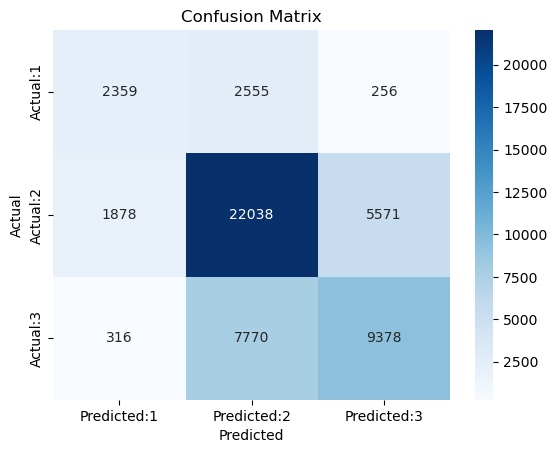

              precision    recall  f1-score   support

           1       0.52      0.46      0.49      5170
           2       0.68      0.75      0.71     29487
           3       0.62      0.54      0.57     17464

    accuracy                           0.65     52121
   macro avg       0.61      0.58      0.59     52121
weighted avg       0.64      0.65      0.64     52121

KNeighborsClassifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.7597
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6480




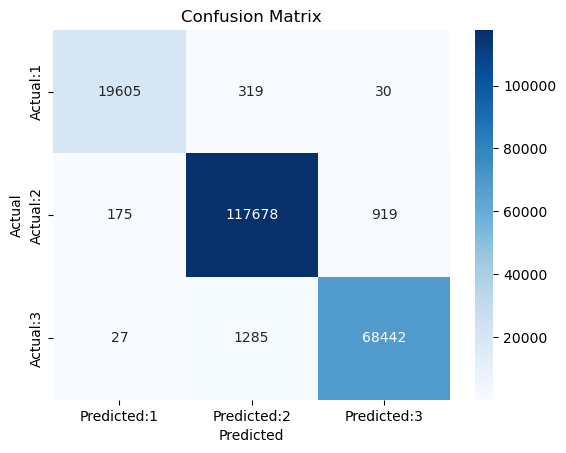

              precision    recall  f1-score   support

           1       0.99      0.98      0.99     19954
           2       0.99      0.99      0.99    118772
           3       0.99      0.98      0.98     69754

    accuracy                           0.99    208480
   macro avg       0.99      0.98      0.99    208480
weighted avg       0.99      0.99      0.99    208480



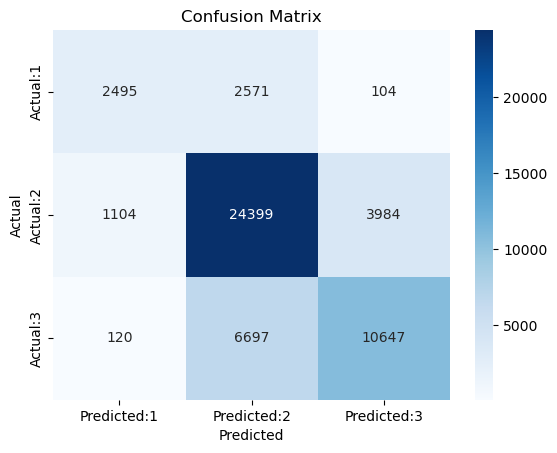

              precision    recall  f1-score   support

           1       0.67      0.48      0.56      5170
           2       0.72      0.83      0.77     29487
           3       0.72      0.61      0.66     17464

    accuracy                           0.72     52121
   macro avg       0.71      0.64      0.67     52121
weighted avg       0.72      0.72      0.71     52121

Random Forest
Model Performance for Training Set
F1 Micro-Averaged Score: 0.9868
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.7203




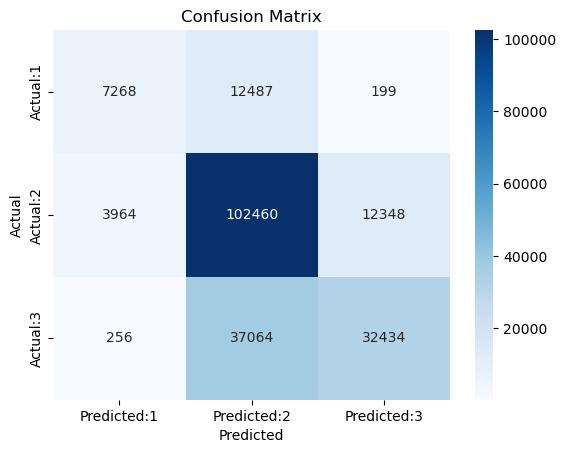

              precision    recall  f1-score   support

           1       0.63      0.36      0.46     19954
           2       0.67      0.86      0.76    118772
           3       0.72      0.46      0.57     69754

    accuracy                           0.68    208480
   macro avg       0.68      0.56      0.59    208480
weighted avg       0.69      0.68      0.66    208480



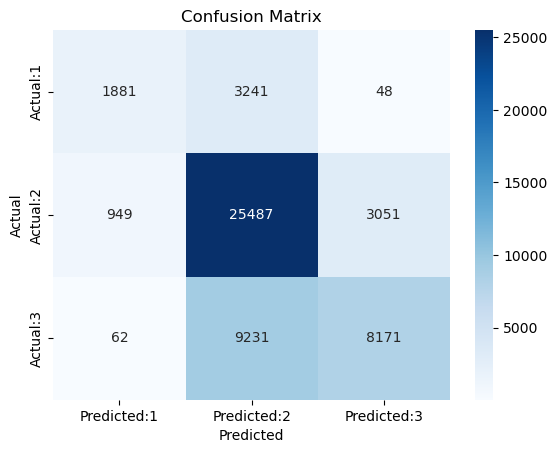

              precision    recall  f1-score   support

           1       0.65      0.36      0.47      5170
           2       0.67      0.86      0.76     29487
           3       0.73      0.47      0.57     17464

    accuracy                           0.68     52121
   macro avg       0.68      0.57      0.60     52121
weighted avg       0.69      0.68      0.66     52121

Gradient Boosting Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.6819
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6819




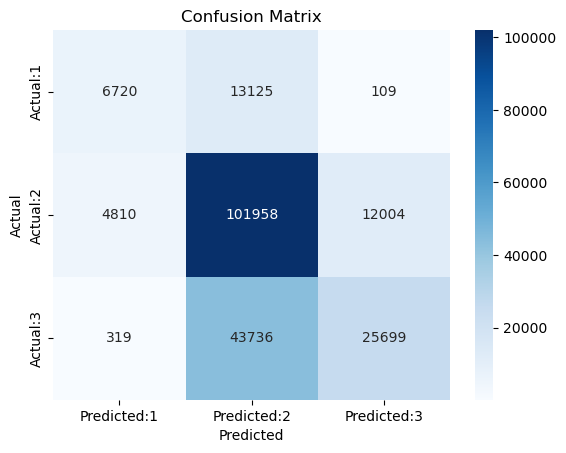

              precision    recall  f1-score   support

           1       0.57      0.34      0.42     19954
           2       0.64      0.86      0.73    118772
           3       0.68      0.37      0.48     69754

    accuracy                           0.64    208480
   macro avg       0.63      0.52      0.55    208480
weighted avg       0.65      0.64      0.62    208480



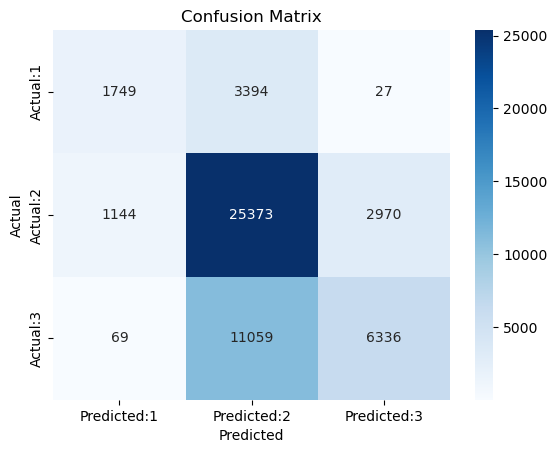

              precision    recall  f1-score   support

           1       0.59      0.34      0.43      5170
           2       0.64      0.86      0.73     29487
           3       0.68      0.36      0.47     17464

    accuracy                           0.64     52121
   macro avg       0.64      0.52      0.55     52121
weighted avg       0.65      0.64      0.62     52121

AdaBoost Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.6446
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6419




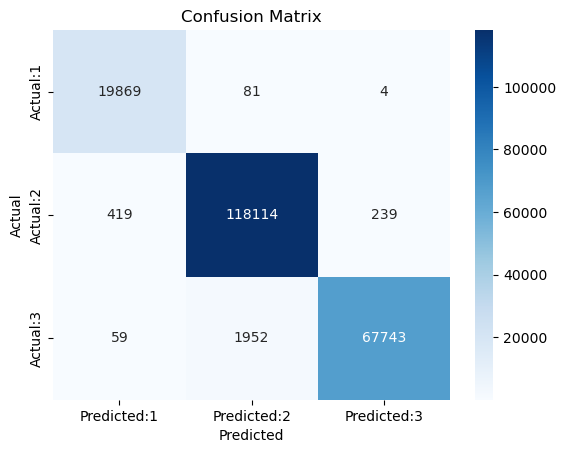

              precision    recall  f1-score   support

           1       0.98      1.00      0.99     19954
           2       0.98      0.99      0.99    118772
           3       1.00      0.97      0.98     69754

    accuracy                           0.99    208480
   macro avg       0.99      0.99      0.99    208480
weighted avg       0.99      0.99      0.99    208480



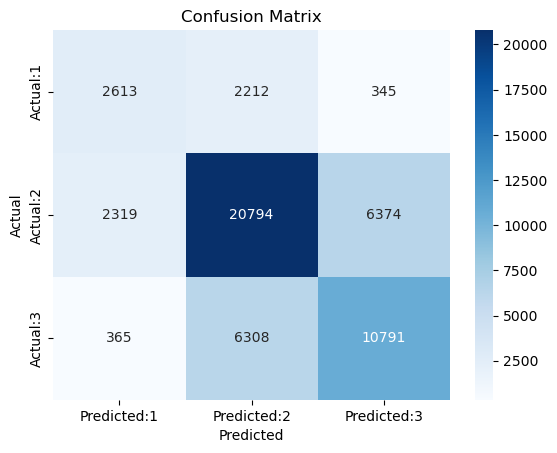

              precision    recall  f1-score   support

           1       0.49      0.51      0.50      5170
           2       0.71      0.71      0.71     29487
           3       0.62      0.62      0.62     17464

    accuracy                           0.66     52121
   macro avg       0.61      0.61      0.61     52121
weighted avg       0.66      0.66      0.66     52121

DecisionTree Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.9868
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6561




In [11]:
results_imbalanced_datasets = train_and_evaluate(X_train, y_train)

#### Results

In [12]:
results_imbalanced_datasets

,Model Name,Micro Averaged F1-Score
1,Random Forest,0.720266
2,Gradient Boosting Classifier,0.681856
4,DecisionTree Classifier,0.656127
0,KNeighborsClassifier,0.648011
3,AdaBoost Classifier,0.641929


### 2. For undersampled Datasets

#### Train the models

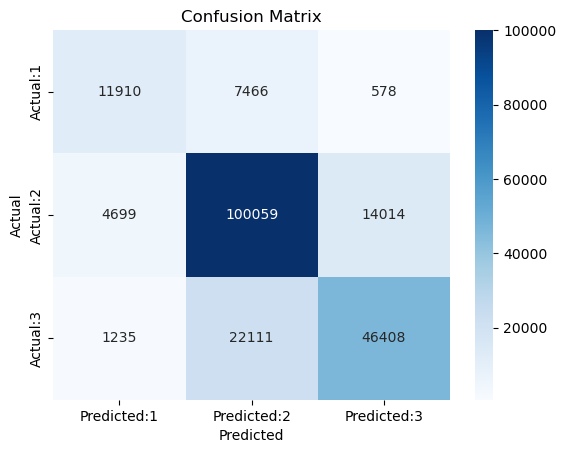

              precision    recall  f1-score   support

           1       0.67      0.60      0.63     19954
           2       0.77      0.84      0.81    118772
           3       0.76      0.67      0.71     69754

    accuracy                           0.76    208480
   macro avg       0.73      0.70      0.72    208480
weighted avg       0.76      0.76      0.76    208480



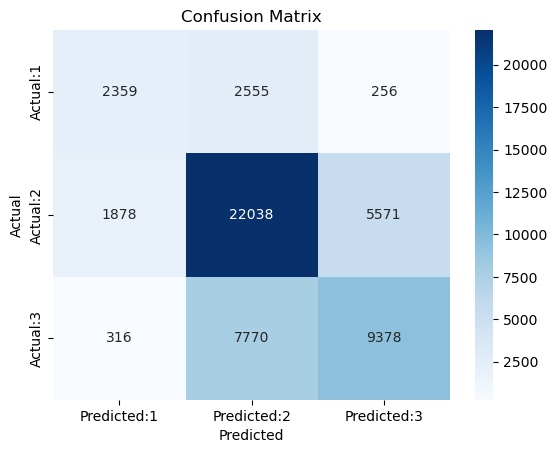

              precision    recall  f1-score   support

           1       0.52      0.46      0.49      5170
           2       0.68      0.75      0.71     29487
           3       0.62      0.54      0.57     17464

    accuracy                           0.65     52121
   macro avg       0.61      0.58      0.59     52121
weighted avg       0.64      0.65      0.64     52121

KNeighborsClassifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.7597
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6480




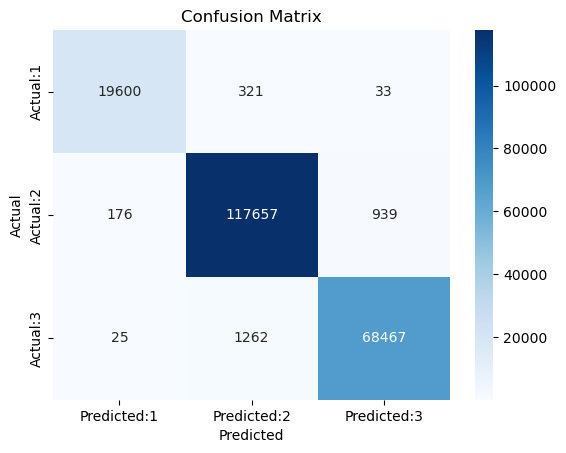

              precision    recall  f1-score   support

           1       0.99      0.98      0.99     19954
           2       0.99      0.99      0.99    118772
           3       0.99      0.98      0.98     69754

    accuracy                           0.99    208480
   macro avg       0.99      0.98      0.99    208480
weighted avg       0.99      0.99      0.99    208480



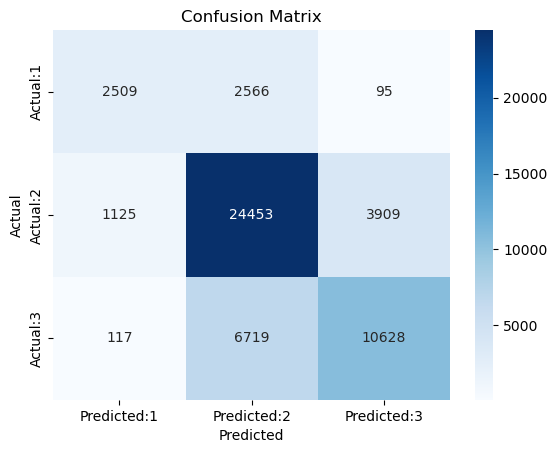

              precision    recall  f1-score   support

           1       0.67      0.49      0.56      5170
           2       0.72      0.83      0.77     29487
           3       0.73      0.61      0.66     17464

    accuracy                           0.72     52121
   macro avg       0.71      0.64      0.67     52121
weighted avg       0.72      0.72      0.72     52121

Random Forest
Model Performance for Training Set
F1 Micro-Averaged Score: 0.9868
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.7212




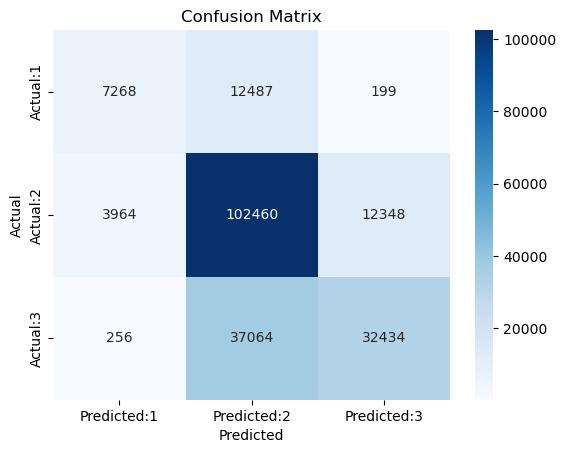

              precision    recall  f1-score   support

           1       0.63      0.36      0.46     19954
           2       0.67      0.86      0.76    118772
           3       0.72      0.46      0.57     69754

    accuracy                           0.68    208480
   macro avg       0.68      0.56      0.59    208480
weighted avg       0.69      0.68      0.66    208480



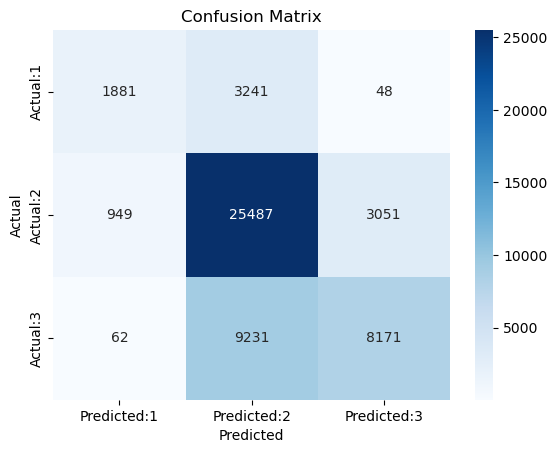

              precision    recall  f1-score   support

           1       0.65      0.36      0.47      5170
           2       0.67      0.86      0.76     29487
           3       0.73      0.47      0.57     17464

    accuracy                           0.68     52121
   macro avg       0.68      0.57      0.60     52121
weighted avg       0.69      0.68      0.66     52121

Gradient Boosting Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.6819
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6819




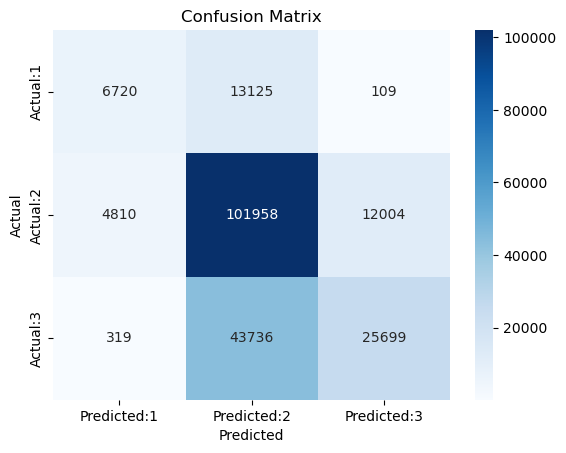

              precision    recall  f1-score   support

           1       0.57      0.34      0.42     19954
           2       0.64      0.86      0.73    118772
           3       0.68      0.37      0.48     69754

    accuracy                           0.64    208480
   macro avg       0.63      0.52      0.55    208480
weighted avg       0.65      0.64      0.62    208480



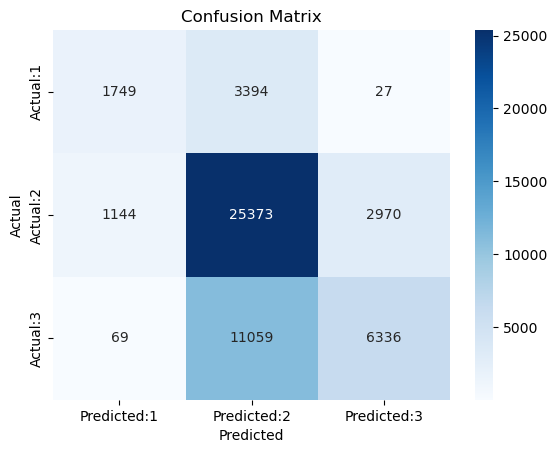

              precision    recall  f1-score   support

           1       0.59      0.34      0.43      5170
           2       0.64      0.86      0.73     29487
           3       0.68      0.36      0.47     17464

    accuracy                           0.64     52121
   macro avg       0.64      0.52      0.55     52121
weighted avg       0.65      0.64      0.62     52121

AdaBoost Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.6446
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6419




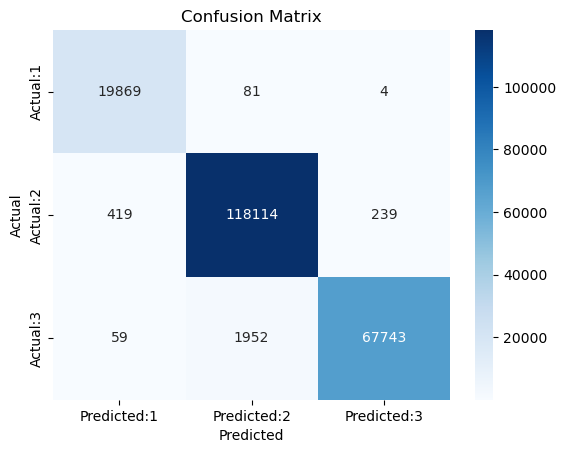

              precision    recall  f1-score   support

           1       0.98      1.00      0.99     19954
           2       0.98      0.99      0.99    118772
           3       1.00      0.97      0.98     69754

    accuracy                           0.99    208480
   macro avg       0.99      0.99      0.99    208480
weighted avg       0.99      0.99      0.99    208480



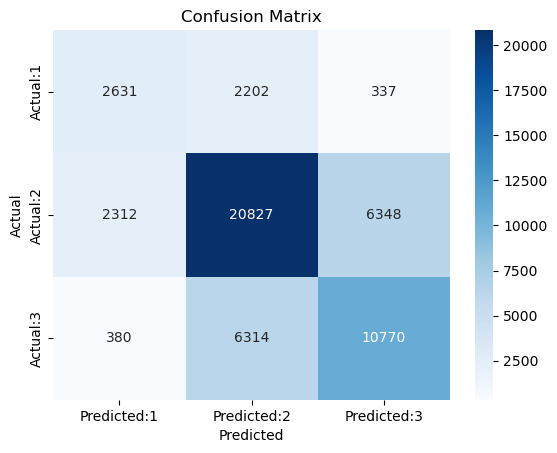

              precision    recall  f1-score   support

           1       0.49      0.51      0.50      5170
           2       0.71      0.71      0.71     29487
           3       0.62      0.62      0.62     17464

    accuracy                           0.66     52121
   macro avg       0.61      0.61      0.61     52121
weighted avg       0.66      0.66      0.66     52121

DecisionTree Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.9868
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6567




In [13]:
results_undersample_datasets = train_and_evaluate(X_train_under_sample, y_train_under_sample)

#### Results

In [14]:
results_undersample_datasets

,Model Name,Micro Averaged F1-Score
1,Random Forest,0.721206
2,Gradient Boosting Classifier,0.681856
4,DecisionTree Classifier,0.656703
0,KNeighborsClassifier,0.648011
3,AdaBoost Classifier,0.641929


### 3. For oversampled Datasets

#### Train the models

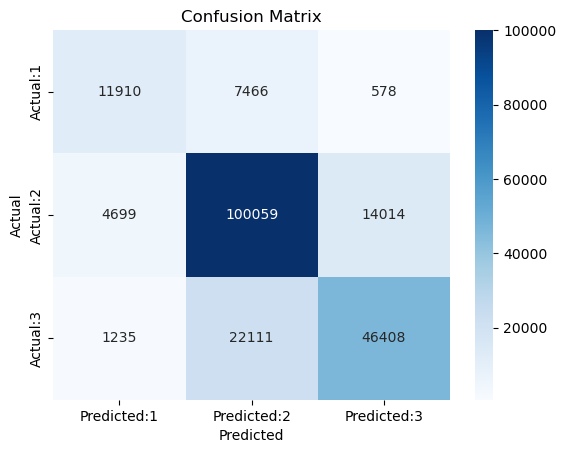

              precision    recall  f1-score   support

           1       0.67      0.60      0.63     19954
           2       0.77      0.84      0.81    118772
           3       0.76      0.67      0.71     69754

    accuracy                           0.76    208480
   macro avg       0.73      0.70      0.72    208480
weighted avg       0.76      0.76      0.76    208480



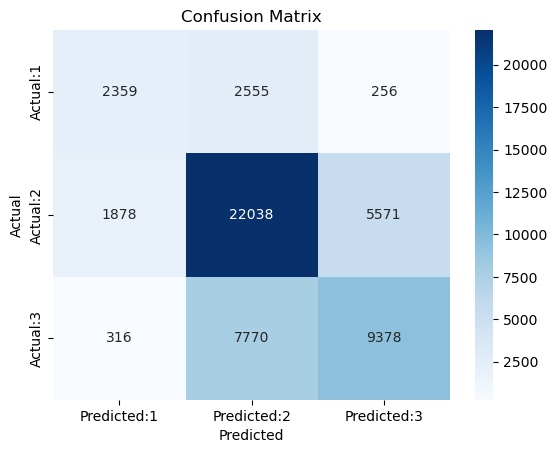

              precision    recall  f1-score   support

           1       0.52      0.46      0.49      5170
           2       0.68      0.75      0.71     29487
           3       0.62      0.54      0.57     17464

    accuracy                           0.65     52121
   macro avg       0.61      0.58      0.59     52121
weighted avg       0.64      0.65      0.64     52121

KNeighborsClassifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.7597
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6480




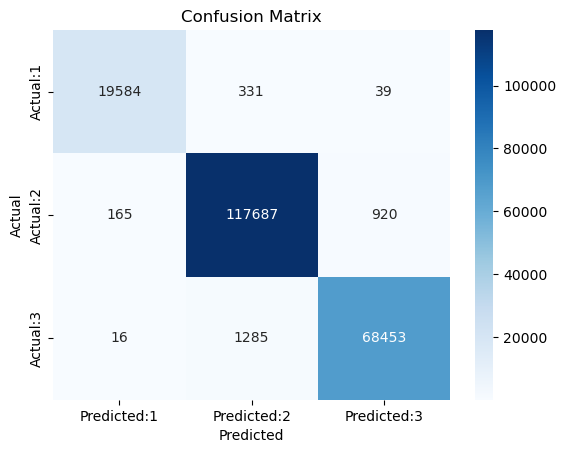

              precision    recall  f1-score   support

           1       0.99      0.98      0.99     19954
           2       0.99      0.99      0.99    118772
           3       0.99      0.98      0.98     69754

    accuracy                           0.99    208480
   macro avg       0.99      0.98      0.99    208480
weighted avg       0.99      0.99      0.99    208480



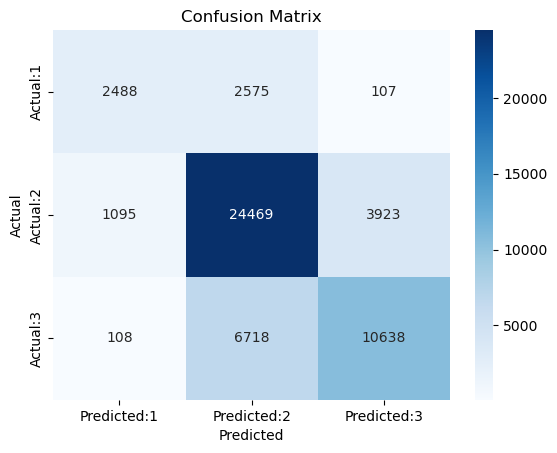

              precision    recall  f1-score   support

           1       0.67      0.48      0.56      5170
           2       0.72      0.83      0.77     29487
           3       0.73      0.61      0.66     17464

    accuracy                           0.72     52121
   macro avg       0.71      0.64      0.67     52121
weighted avg       0.72      0.72      0.72     52121

Random Forest
Model Performance for Training Set
F1 Micro-Averaged Score: 0.9868
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.7213




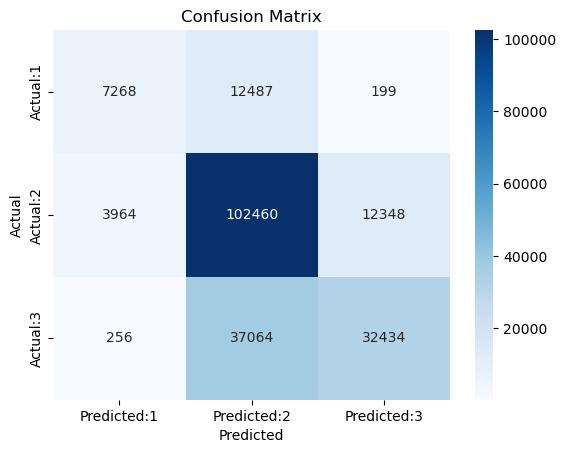

              precision    recall  f1-score   support

           1       0.63      0.36      0.46     19954
           2       0.67      0.86      0.76    118772
           3       0.72      0.46      0.57     69754

    accuracy                           0.68    208480
   macro avg       0.68      0.56      0.59    208480
weighted avg       0.69      0.68      0.66    208480



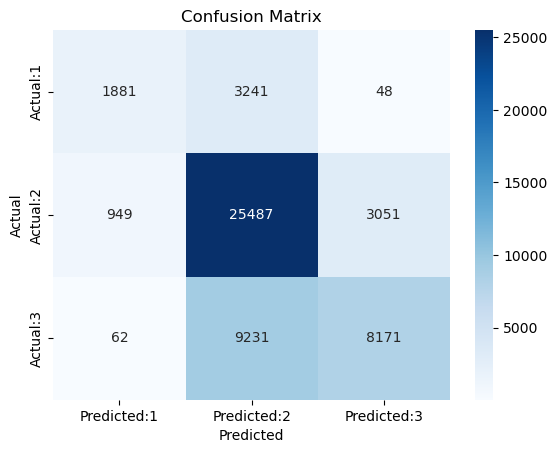

              precision    recall  f1-score   support

           1       0.65      0.36      0.47      5170
           2       0.67      0.86      0.76     29487
           3       0.73      0.47      0.57     17464

    accuracy                           0.68     52121
   macro avg       0.68      0.57      0.60     52121
weighted avg       0.69      0.68      0.66     52121

Gradient Boosting Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.6819
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6819




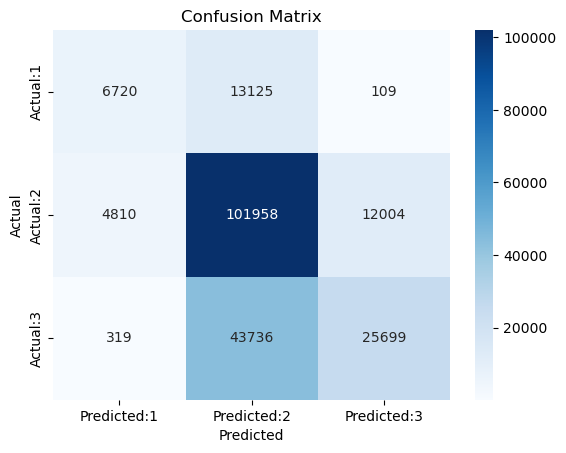

              precision    recall  f1-score   support

           1       0.57      0.34      0.42     19954
           2       0.64      0.86      0.73    118772
           3       0.68      0.37      0.48     69754

    accuracy                           0.64    208480
   macro avg       0.63      0.52      0.55    208480
weighted avg       0.65      0.64      0.62    208480



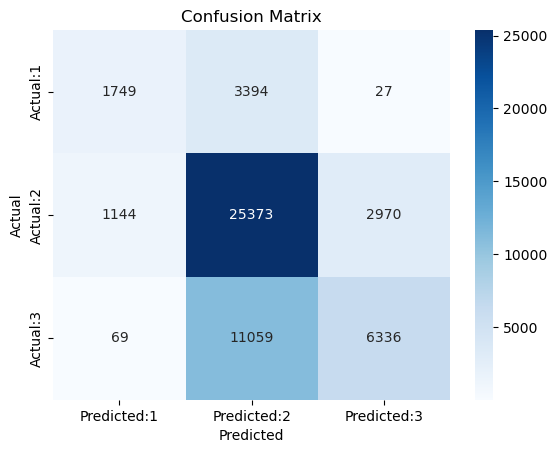

              precision    recall  f1-score   support

           1       0.59      0.34      0.43      5170
           2       0.64      0.86      0.73     29487
           3       0.68      0.36      0.47     17464

    accuracy                           0.64     52121
   macro avg       0.64      0.52      0.55     52121
weighted avg       0.65      0.64      0.62     52121

AdaBoost Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.6446
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6419




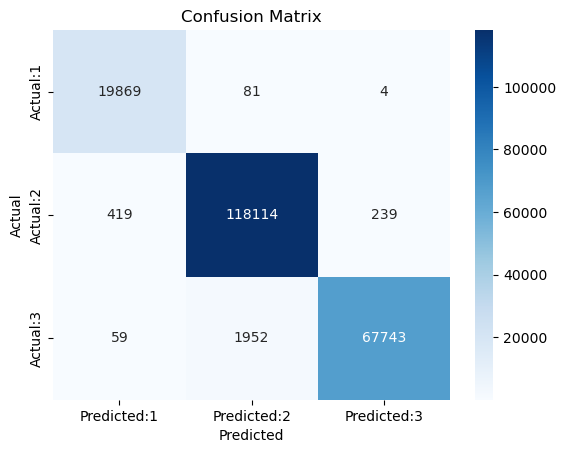

              precision    recall  f1-score   support

           1       0.98      1.00      0.99     19954
           2       0.98      0.99      0.99    118772
           3       1.00      0.97      0.98     69754

    accuracy                           0.99    208480
   macro avg       0.99      0.99      0.99    208480
weighted avg       0.99      0.99      0.99    208480



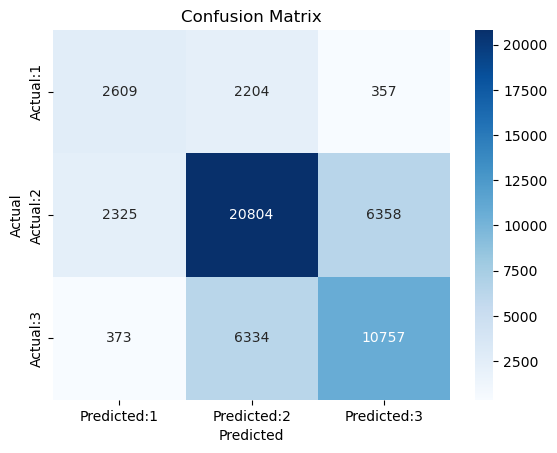

              precision    recall  f1-score   support

           1       0.49      0.50      0.50      5170
           2       0.71      0.71      0.71     29487
           3       0.62      0.62      0.62     17464

    accuracy                           0.66     52121
   macro avg       0.61      0.61      0.61     52121
weighted avg       0.66      0.66      0.66     52121

DecisionTree Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.9868
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6556




In [15]:
results_oversample_datasets = train_and_evaluate(X_train_over_sample, y_train_over_sample)

#### Results

In [16]:
results_oversample_datasets

,Model Name,Micro Averaged F1-Score
1,Random Forest,0.721302
2,Gradient Boosting Classifier,0.681856
4,DecisionTree Classifier,0.655590
0,KNeighborsClassifier,0.648011
3,AdaBoost Classifier,0.641929


### 4. For SMOTE 

#### Train the models

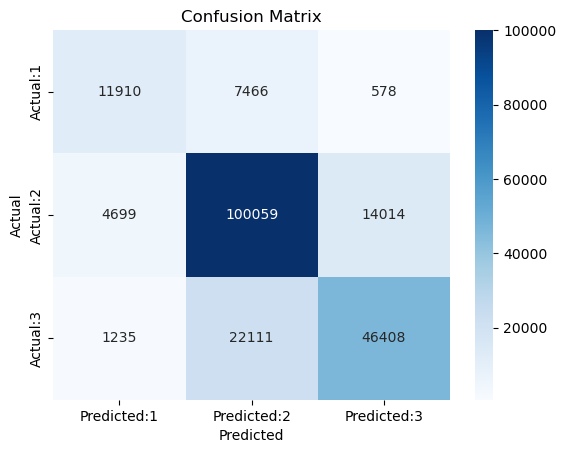

              precision    recall  f1-score   support

           1       0.67      0.60      0.63     19954
           2       0.77      0.84      0.81    118772
           3       0.76      0.67      0.71     69754

    accuracy                           0.76    208480
   macro avg       0.73      0.70      0.72    208480
weighted avg       0.76      0.76      0.76    208480



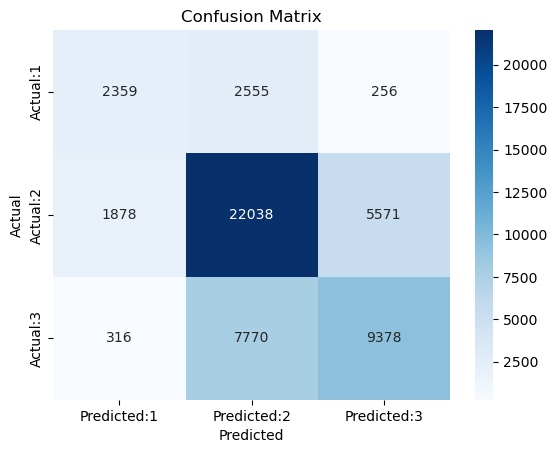

              precision    recall  f1-score   support

           1       0.52      0.46      0.49      5170
           2       0.68      0.75      0.71     29487
           3       0.62      0.54      0.57     17464

    accuracy                           0.65     52121
   macro avg       0.61      0.58      0.59     52121
weighted avg       0.64      0.65      0.64     52121

KNeighborsClassifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.7597
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6480




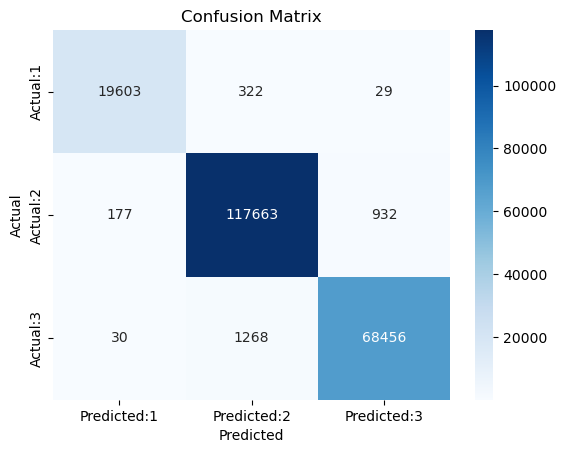

              precision    recall  f1-score   support

           1       0.99      0.98      0.99     19954
           2       0.99      0.99      0.99    118772
           3       0.99      0.98      0.98     69754

    accuracy                           0.99    208480
   macro avg       0.99      0.98      0.99    208480
weighted avg       0.99      0.99      0.99    208480



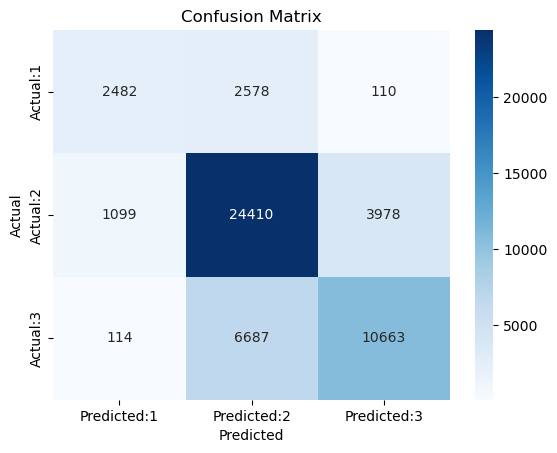

              precision    recall  f1-score   support

           1       0.67      0.48      0.56      5170
           2       0.72      0.83      0.77     29487
           3       0.72      0.61      0.66     17464

    accuracy                           0.72     52121
   macro avg       0.71      0.64      0.66     52121
weighted avg       0.72      0.72      0.71     52121

Random Forest
Model Performance for Training Set
F1 Micro-Averaged Score: 0.9868
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.7205




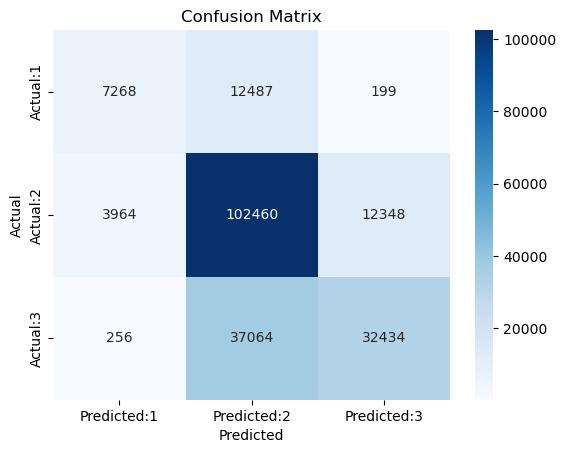

              precision    recall  f1-score   support

           1       0.63      0.36      0.46     19954
           2       0.67      0.86      0.76    118772
           3       0.72      0.46      0.57     69754

    accuracy                           0.68    208480
   macro avg       0.68      0.56      0.59    208480
weighted avg       0.69      0.68      0.66    208480



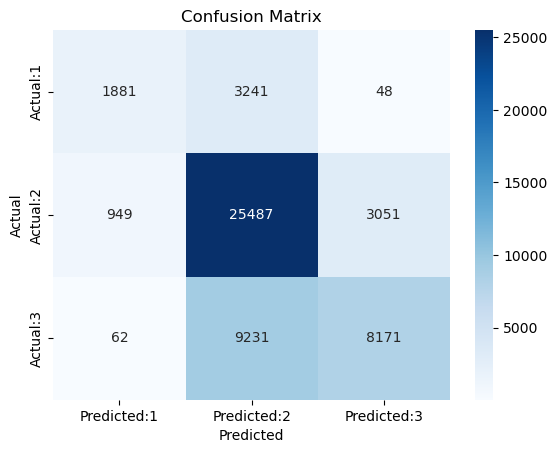

              precision    recall  f1-score   support

           1       0.65      0.36      0.47      5170
           2       0.67      0.86      0.76     29487
           3       0.73      0.47      0.57     17464

    accuracy                           0.68     52121
   macro avg       0.68      0.57      0.60     52121
weighted avg       0.69      0.68      0.66     52121

Gradient Boosting Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.6819
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6819




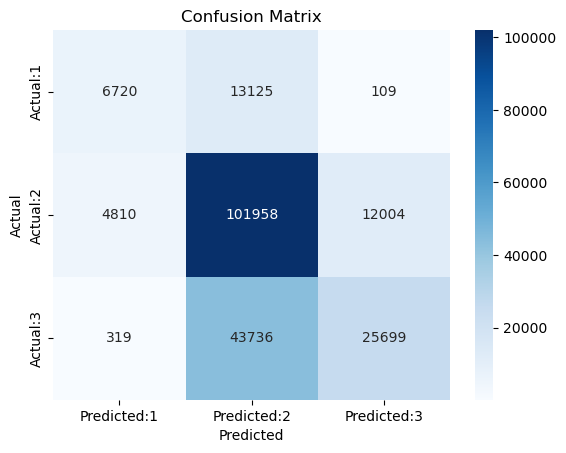

              precision    recall  f1-score   support

           1       0.57      0.34      0.42     19954
           2       0.64      0.86      0.73    118772
           3       0.68      0.37      0.48     69754

    accuracy                           0.64    208480
   macro avg       0.63      0.52      0.55    208480
weighted avg       0.65      0.64      0.62    208480



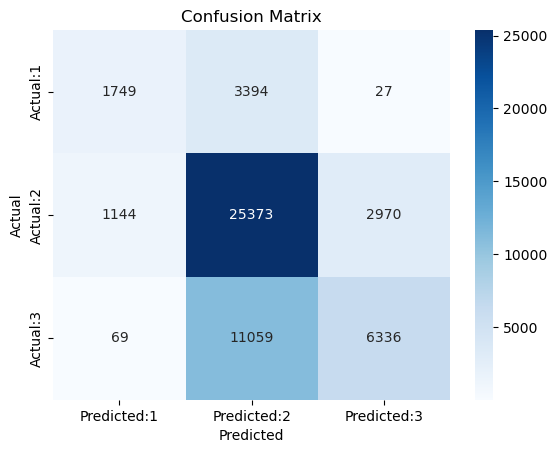

              precision    recall  f1-score   support

           1       0.59      0.34      0.43      5170
           2       0.64      0.86      0.73     29487
           3       0.68      0.36      0.47     17464

    accuracy                           0.64     52121
   macro avg       0.64      0.52      0.55     52121
weighted avg       0.65      0.64      0.62     52121

AdaBoost Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.6446
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6419




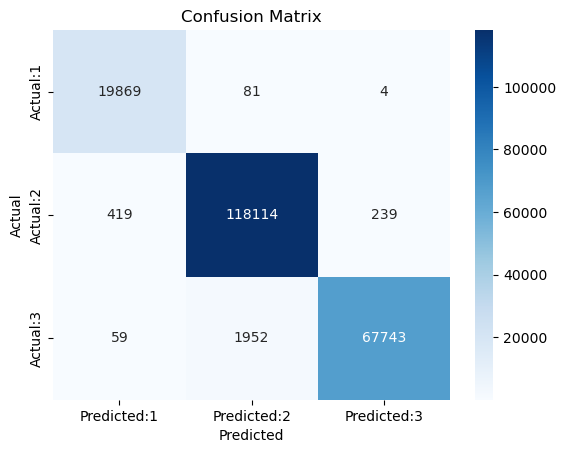

              precision    recall  f1-score   support

           1       0.98      1.00      0.99     19954
           2       0.98      0.99      0.99    118772
           3       1.00      0.97      0.98     69754

    accuracy                           0.99    208480
   macro avg       0.99      0.99      0.99    208480
weighted avg       0.99      0.99      0.99    208480



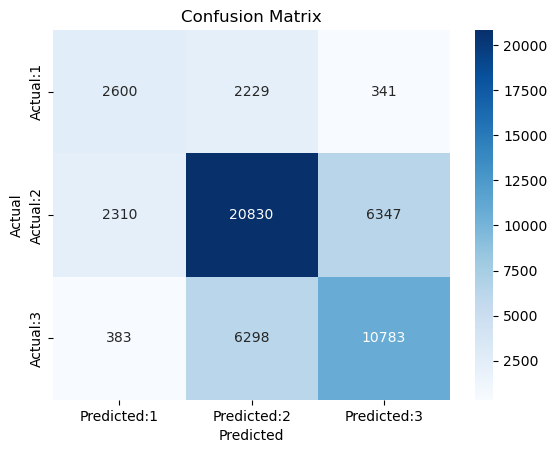

              precision    recall  f1-score   support

           1       0.49      0.50      0.50      5170
           2       0.71      0.71      0.71     29487
           3       0.62      0.62      0.62     17464

    accuracy                           0.66     52121
   macro avg       0.61      0.61      0.61     52121
weighted avg       0.66      0.66      0.66     52121

DecisionTree Classifier
Model Performance for Training Set
F1 Micro-Averaged Score: 0.9868
--------------------------------------
Model Performance for Validation Set
F1 Micro-Averaged Score: 0.6564




In [17]:
results_smote = train_and_evaluate(X_train_smote, y_train_smote)

#### Results

In [18]:
results_smote

,Model Name,Micro Averaged F1-Score
1,Random Forest,0.720535
2,Gradient Boosting Classifier,0.681856
4,DecisionTree Classifier,0.656415
0,KNeighborsClassifier,0.648011
3,AdaBoost Classifier,0.641929
